In [42]:
library("DESeq2")

In [43]:
library("tximeta")

In [44]:
library("ggplot2")

In [45]:
library("SummarizedExperiment") 

In [46]:
#library("MeSH.Eca.eg.db")

In [63]:
dir <- '/home/agalab/Scrivania/RNA_seq_trial'

In [64]:
coldata <- read.csv(file.path(dir, "coldata.csv"))

In [65]:
coldata

names,individual,age,replica,libraryprepdate,lab,seqdate,laboratory,batch
<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>
Adipose_Loin_ERR2584116,FAANG1,5.6,1,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA
Adipose_Loin_ERR2584168,FAANG2,4.5,2,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA
Adrenal_Cortex_ERR2584117,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Adrenal_Cortex_ERR2584118,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Adrenal_Cortex_ERR2584169,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Adrenal_Cortex_ERR2584170,FAANG2,4.5,4,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Atrium_ERR2584140,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Atrium_ERR2584141,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA
Atrium_ERR2584192,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA


In [66]:
coldata$files <- file.path(dir, "quants", coldata$names, "quant.sf")

In [67]:
all(file.exists(coldata$files))

[1] TRUE

In [68]:
coldata

names,individual,age,replica,libraryprepdate,lab,seqdate,laboratory,batch,files
<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
Adipose_Loin_ERR2584116,FAANG1,5.6,1,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584116/quant.sf
Adipose_Loin_ERR2584168,FAANG2,4.5,2,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584168/quant.sf
Adrenal_Cortex_ERR2584117,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584117/quant.sf
Adrenal_Cortex_ERR2584118,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584118/quant.sf
Adrenal_Cortex_ERR2584169,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584169/quant.sf
Adrenal_Cortex_ERR2584170,FAANG2,4.5,4,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584170/quant.sf
Atrium_ERR2584140,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Atrium_ERR2584140/quant.sf
Atrium_ERR2584141,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Atrium_ERR2584141/quant.sf
Atrium_ERR2584192,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Atrium_ERR2584192/quant.sf


In [69]:
sub("^(.+_.+)_.+$","\\1",head(coldata$names))

[1] "Adipose_Loin"   "Adipose_Loin"   "Adrenal_Cortex" "Adrenal_Cortex"
[5] "Adrenal_Cortex" "Adrenal_Cortex"

In [70]:
coldata$tissue <- sub("^(.+_.+)_.+$","\\1",coldata$names)

In [71]:
head(coldata)

,names,individual,age,replica,libraryprepdate,lab,seqdate,laboratory,batch,files,tissue
,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,Adipose_Loin_ERR2584116,FAANG1,5.6,1,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584116/quant.sf,Adipose_Loin
2,Adipose_Loin_ERR2584168,FAANG2,4.5,2,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584168/quant.sf,Adipose_Loin
3,Adrenal_Cortex_ERR2584117,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584117/quant.sf,Adrenal_Cortex
4,Adrenal_Cortex_ERR2584118,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584118/quant.sf,Adrenal_Cortex
5,Adrenal_Cortex_ERR2584169,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584169/quant.sf,Adrenal_Cortex
6,Adrenal_Cortex_ERR2584170,FAANG2,4.5,4,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584170/quant.sf,Adrenal_Cortex


In [72]:
names(coldata)

[1] "names"           "individual"      "age"             "replica"        
 [5] "libraryprepdate" "lab"             "seqdate"         "laboratory"     
 [9] "batch"           "files"           "tissue"

In [73]:
metaData = coldata[c(11,1:10)]

In [74]:
head(metaData)

,tissue,names,individual,age,replica,libraryprepdate,lab,seqdate,laboratory,batch,files
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,Adipose_Loin,Adipose_Loin_ERR2584116,FAANG1,5.6,1,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584116/quant.sf
2,Adipose_Loin,Adipose_Loin_ERR2584168,FAANG2,4.5,2,2017-01-12,University of Minnesota Genomics Centers,2017-02,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adipose_Loin_ERR2584168/quant.sf
3,Adrenal_Cortex,Adrenal_Cortex_ERR2584117,FAANG1,5.6,1,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584117/quant.sf
4,Adrenal_Cortex,Adrenal_Cortex_ERR2584118,FAANG1,5.6,2,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584118/quant.sf
5,Adrenal_Cortex,Adrenal_Cortex_ERR2584169,FAANG2,4.5,3,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584169/quant.sf
6,Adrenal_Cortex,Adrenal_Cortex_ERR2584170,FAANG2,4.5,4,2017-07-13,University of Minnesota Genomics Centers,2017-08,University of Minnesota Genomics Centers,NA,/home/agalab/Scrivania/RNA_seq_trial/quants/Adrenal_Cortex_ERR2584170/quant.sf


In [75]:
# since tximeta, that we will use for the data extraction from salmon output, does not have the horse,
# we need to manually import it with the following code
# basically we have to provide the original gff and the trascript fasta file, together with the salmon index

In [76]:
indexDir <- file.path(dir, "EqIndex") # my salmon index
fastaFTP <- c('ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/863/925/GCF_002863925.1_EquCab3.0/GCF_002863925.1_EquCab3.0_rna.fna.gz')
gtfPath <- file.path(dir,"GCF_002863925.1_EquCab3.0_genomic.gff") # only the original one is accepted


tmp <- tempdir()
jsonFile <- file.path(tmp, paste0(basename(indexDir), ".json"))
makeLinkedTxome(indexDir=indexDir,
                source="NCBI", organism="Equus caballus",
                release="EquCab3.0", genome="equCab3",
                fasta=fastaFTP, gtf=gtfPath,
                jsonFile=jsonFile)

writing linkedTxome to /tmp/RtmpWVt5T3/EqIndex.json

linkedTxome is same as already in bfc



In [77]:
se <- tximeta(coldata = metaData, type = "salmon", dropInfReps = TRUE)

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 


found matching linked transcriptome:
[ NCBI - Equus caballus - release EquCab3.0 ]

building TxDb with 'GenomicFeatures' package

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .extract_exons_from_GRanges(exon_IDX, gr, mcols0, tx_IDX, feature = "exon", :
"716 exons couldn't be linked to a transcript so were dropped (showing
  only the first 6):
  

In [78]:
#str(se)

In [80]:
#head(assay(se, "counts"), 3) # the first 3 genes per sample 

In [81]:
seg <- summarizeToGene(se)

loading existing TxDb created: 2021-01-18 08:53:57

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

obtaining transcript-to-gene mapping from database

generating gene ranges

  71 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.

summarizing abundance

summarizing counts

summarizing length

Warning message in checkAssays2Txps(assays, g):
"

25 out of 29163 txps were missing from GTF/GFF but were in the indexed FASTA.
(This occurs sometimes with Ensembl txps on haplotype chromosomes.)
In order to build a ranged SummarizedExperiment, these txps were removed.
To keep these txps, and to skip adding ranges, use skipMeta=TRUE

Example missing txps: [ABCC9, CCNG2, CCPG1, ...]


In [82]:
dds <- DESeqDataSet(seg, design = ~ tissue + replica)

using counts and average transcript lengths from tximeta

Warning message in DESeqDataSet(seg, design = ~tissue + replica):
"some variables in design formula are characters, converting to factors"
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



In [83]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [84]:
#vsd <- varianceStabilizingTransformation(dds, blind = TRUE)

In [85]:
library("BiocParallel")

In [86]:
register(MulticoreParam(6))

In [87]:
dds <- DESeq(dds, parallel = TRUE)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates: 6 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 6 workers



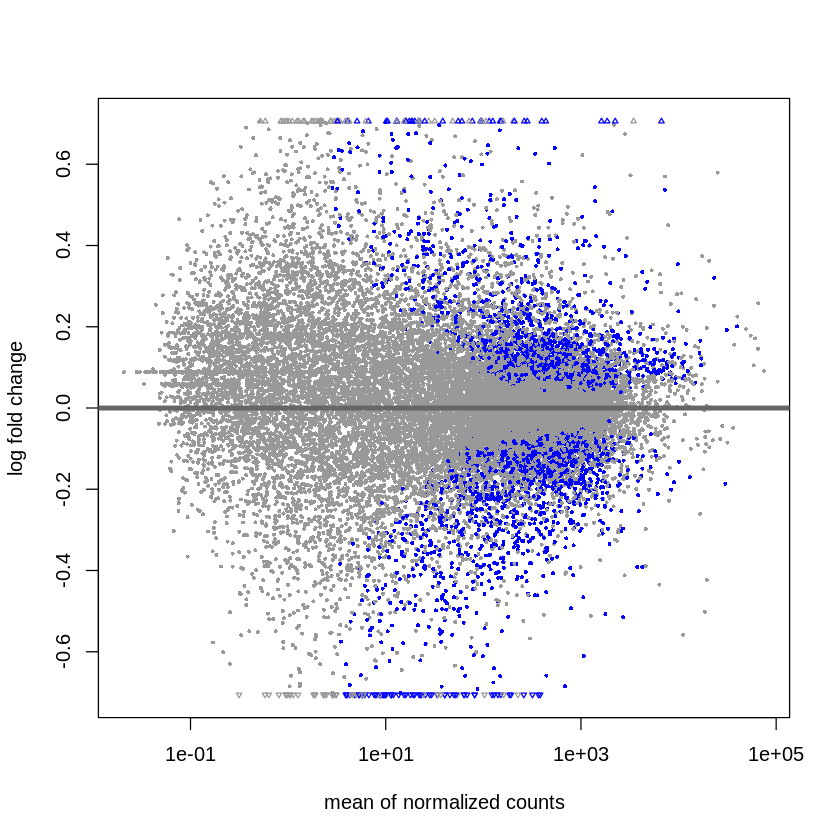

In [88]:
plotMA(results(dds))

In [89]:
resultsNames (dds)

[1] "Intercept"                                      
 [2] "tissue_Adrenal_Cortex_vs_Adipose_Loin"          
 [3] "tissue_Atrium_ERR2584140_vs_Adipose_Loin"       
 [4] "tissue_Atrium_ERR2584141_vs_Adipose_Loin"       
 [5] "tissue_Atrium_ERR2584192_vs_Adipose_Loin"       
 [6] "tissue_Atrium_ERR2584193_vs_Adipose_Loin"       
 [7] "tissue_Cerebellum_Vermis_vs_Adipose_Loin"       
 [8] "tissue_Cornea_ERR2584121_vs_Adipose_Loin"       
 [9] "tissue_Cornea_ERR2584122_vs_Adipose_Loin"       
[10] "tissue_Cornea_ERR2584173_vs_Adipose_Loin"       
[11] "tissue_Cornea_ERR2584174_vs_Adipose_Loin"       
[12] "tissue_DRG_ERR2584123_vs_Adipose_Loin"          
[13] "tissue_DRG_ERR2584124_vs_Adipose_Loin"          
[14] "tissue_DRG_ERR2584175_vs_Adipose_Loin"          
[15] "tissue_DRG_ERR2584176_vs_Adipose_Loin"          
[16] "tissue_Duodenum_ERR2584110_vs_Adipose_Loin"     
[17] "tissue_Duodenum_ERR2584111_vs_Adipose_Loin"     
[18] "tissue_Duodenum_ERR2584220_vs_Adipose_Loin"     
[19] "tissue_Duodenum_ERR2584221_vs_Adipose_Loin"     
[20] "tissue_Fibroblasts_ERR2584125_vs_Adipose_Loin"  
[21] "tissue_Fibroblasts_ERR2584126_vs_Adipose_Loin"  
[22] "tissue_Fibroblasts_ERR2584177_vs_Adipose_Loin"  
[23] "tissue_Fibroblasts_ERR2584178_vs_Adipose_Loin"  
[24] "tissue_Frontal_Cortex_vs_Adipose_Loin"          
[25] "tissue_Gluteal_Muscle_vs_Adipose_Loin"          
[26] "tissue_Hypothalamus_ERR2584131_vs_Adipose_Loin" 
[27] "tissue_Hypothalamus_ERR2584132_vs_Adipose_Loin" 
[28] "tissue_Hypothalamus_ERR2584183_vs_Adipose_Loin" 
[29] "tissue_Hypothalamus_ERR2584184_vs_Adipose_Loin" 
[30] "tissue_Ileum_ERR2584112_vs_Adipose_Loin"        
[31] "tissue_Ileum_ERR2584113_vs_Adipose_Loin"        
[32] "tissue_Ileum_ERR2584222_vs_Adipose_Loin"        
[33] "tissue_Ileum_ERR2584223_vs_Adipose_Loin"        
[34] "tissue_Jejunum_ERR2584114_vs_Adipose_Loin"      
[35] "tissue_Jejunum_ERR2584115_vs_Adipose_Loin"      
[36] "tissue_Jejunum_ERR2584224_vs_Adipose_Loin"      
[37] "tissue_Jejunum_ERR2584225_vs_Adipose_Loin"      
[38] "tissue_Keratinocytes_ERR2584133_vs_Adipose_Loin"
[39] "tissue_Keratinocytes_ERR2584134_vs_Adipose_Loin"
[40] "tissue_Keratinocytes_ERR2584185_vs_Adipose_Loin"
[41] "tissue_Keratinocytes_ERR2584186_vs_Adipose_Loin"
[42] "tissue_Lamina_ERR2584135_vs_Adipose_Loin"       
[43] "tissue_Lamina_ERR2584187_vs_Adipose_Loin"       
[44] "tissue_Larynx_ERR2584136_vs_Adipose_Loin"       
[45] "tissue_Larynx_ERR2584137_vs_Adipose_Loin"       
[46] "tissue_Larynx_ERR2584188_vs_Adipose_Loin"       
[47] "tissue_Larynx_ERR2584189_vs_Adipose_Loin"       
[48] "tissue_LatCerebellum_ERR2584138_vs_Adipose_Loin"
[49] "tissue_LatCerebellum_ERR2584139_vs_Adipose_Loin"
[50] "tissue_LatCerebellum_ERR2584190_vs_Adipose_Loin"
[51] "tissue_LatCerebellum_ERR2584191_vs_Adipose_Loin"
[52] "tissue_Liver_ERR2584143_vs_Adipose_Loin"        
[53] "tissue_Liver_ERR2584195_vs_Adipose_Loin"        
[54] "tissue_Longissimus_ERR2584144_vs_Adipose_Loin"  
[55] "tissue_Longissimus_ERR2584196_vs_Adipose_Loin"  
[56] "tissue_Lung_ERR2584145_vs_Adipose_Loin"         
[57] "tissue_Lung_ERR2584197_vs_Adipose_Loin"         
[58] "tissue_Mammary_Gland_vs_Adipose_Loin"           
[59] "tissue_Mitral_Valve_vs_Adipose_Loin"            
[60] "tissue_Occipital_Cortex_vs_Adipose_Loin"        
[61] "tissue_Ovary_ERR2584152_vs_Adipose_Loin"        
[62] "tissue_Ovary_ERR2584204_vs_Adipose_Loin"        
[63] "tissue_Parietal_Cortex_vs_Adipose_Loin"         
[64] "tissue_PBMC_ERR2584108_vs_Adipose_Loin"         
[65] "tissue_PBMC_ERR2584109_vs_Adipose_Loin"         
[66] "tissue_Retina_ERR2584154_vs_Adipose_Loin"       
[67] "tissue_Retina_ERR2584155_vs_Adipose_Loin"       
[68] "tissue_Retina_ERR2584206_vs_Adipose_Loin"       
[69] "tissue_Retina_ERR2584207_vs_Adipose_Loin"       
[70] "tissue_Sacrocaudalis_ERR2584156_vs_Adipose_Loin"
[71] "tissue_Sacrocaudalis_ERR2584157_vs_Adipose_Loin"
[72] "tissue_Sacrocaudalis_ERR2584208_vs_Adipose_Loin"
[73] "tissue_Sacrocaudalis_ERR2584209_vs_

In [90]:
resLFC <- lfcShrink(dds, contrast="", type="apeglm")
resLFC

ERROR: Error in checkContrast(contrast, resNames): 'contrast', as a character vector of length 3, should have the form:
contrast = c('factorName','numeratorLevel','denominatorLevel'),
see the manual page of ?results for more information


In [ ]:
#vsn::meanSdPlot(assay(seg, "counts"))

In [ ]:
#vsn::meanSdPlot(log2(assay(seg, "counts") + 1))

In [ ]:
#vsn::meanSdPlot(assay(vsd))

In [ ]:
#library(ggplot2)
#rv <- rowVars(assay(vsd))
#sel <- order(rv, decreasing = TRUE)[1:500]
#pca <- prcomp(t(assay(vsd)[sel, ]))
#df <- data.frame(pca$x[, 1:2], colData(vsd))
#ggplot(df, aes(x = PC1, y = PC2, color = tissue)) + 
#  geom_point(size = 2) + theme_bw()

In [ ]:
#plotPCA(vsd, intgroup="")

In [ ]:
#nrow(dds)

In [ ]:
#keep <- rowSums(counts(dds)) > 1
#sum(keep)

In [ ]:
#dds <- DESeq(dds)

In [ ]:
#dds

In [ ]:
#resultsNames (dds)

In [ ]:
#resOrdered <- res[order(res$pvalue),] # Reorder the p-values
#resOrderedDF <- as.data.frame(resOrdered)
#write.csv(resOrderedDF, file = "resultsDEA_try.csv")

In [ ]:
#head(res)

In [ ]:
#summary(res)

In [ ]:
#resLFC <- lfcShrink(dds, coef="", type="")
#resLFC

In [ ]:
#plotMA(resLFC, ylim=c(-,))

In [ ]:
#plotMA(resLFC)
#selGene <- "TERT"
#with(resLFC[selGene, ], {
#  points(baseMean, log2FoldChange, col="black", cex=2, lwd=2)
#  text(baseMean, log2FoldChange, selGene, pos=2, col="black")
#})

In [ ]:
#counts(dds, normalized=T)

In [ ]:
#sum(res$padj < 0.1, na.rm=TRUE)

In [ ]:
#res05 <- results(dds, alpha=0.05)
#summary(res05)

In [ ]:
#dds <- DESeq(dds, test="LRT", reduced=~)
#res <- results(dds)